In [147]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)

In [148]:
import csv
f = open('review_data_all_brand.csv', 'r', encoding='cp949')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

['brand', 'date', 'rate', 'id', 'skin_type', 'select_1_title', 'select_1_content', 'select_2_title', 'select_2_content', 'select_3_title', 'select_3_content', 'txt']


In [149]:
# 데이터 불러오기
review = pd.read_csv('review_data_all_brand.csv', encoding='cp949')

In [150]:
# 컬럼 제거
review = review.drop(columns=['date', 'id', 'skin_type','select_1_title','select_2_title','select_3_title'])

In [151]:
# 컬럼 리네임
review.rename({'brand':'브랜드', 'rate': '평점', 'select_1_content':'피부타입',
               'select_2_content':'피부고민','select_3_content':'자극도', 'txt':'리뷰' }, axis=1, inplace=True)
review.columns

Index(['브랜드', '평점', '피부타입', '피부고민', '자극도', '리뷰'], dtype='object')

In [152]:
review.head()

,브랜드,평점,피부타입,피부고민,자극도,리뷰
0,닥터지,5점만점에 4점,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요\n크림은 튜브형태러 내줄 생각은 없는건지 궁금해요
1,닥터지,5점만점에 5점,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 ㅎㅎㅎ\n\n물론 건성피부에게 겨울에는 얼굴...
2,닥터지,5점만점에 5점,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯
3,닥터지,5점만점에 5점,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...
4,닥터지,5점만점에 4점,복합성에 좋아요,보습에 좋아요,자극없이 순해요,"- 여름용 수분크림이 필요해서 산 제품이에요.\n- 가격은 세일가로 28,800원 ..."


전처리 작업

In [154]:
# '\n' 제거
def remove_newline(text):
    return re.sub(r'\n', ' ', text)

review['리뷰'] = review['리뷰'].apply(remove_newline)

In [155]:
# 평점 중 점수 추출
def score_conversion(text):
    score_match = re.search(r'(\d+)점$', text) # 숫자 다음 '점'이 있는 패턴 찾기, ex) 5점만점에 4점
    if score_match:
        return score_match.group(1) # 추출된 숫자 반환(score_match에서 괄호로 묶인 첫 번째 그룹(숫자) 반환)
    else:
        return None

review['평점'] = review['평점'].apply(score_conversion)

In [156]:
# 구두점 제거 
from string import punctuation

def repreprocessing(text):
    return ''.join(word for word in text if word not in punctuation or word == '+')

review['리뷰'] = review['리뷰'].apply(repreprocessing)

In [157]:
# 하트 및 '+'를 제외한 구두점 제거
def cleanText(text):
    text = re.sub('[-=,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》❤️♥️♡]', '', text)
    return text

review['리뷰'] = review['리뷰'].apply(cleanText)

In [158]:
# 자음 반복 제거
def cleanText2(text):
 
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', text)
    return text


review['리뷰'] = review['리뷰'].apply(cleanText2)

In [159]:
# 중복값 확인
review['리뷰'].duplicated().sum()

589

In [160]:
# 중복값 제거
review = review.drop_duplicates(subset='리뷰')
review['리뷰'].duplicated().sum()

0

In [161]:
# 전처리 완료 후 모습
review.head()

,브랜드,평점,피부타입,피부고민,자극도,리뷰
0,닥터지,4,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요 크림은 튜브형태러 내줄 생각은 없는건지 궁금해요
1,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...
2,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯
3,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...
4,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 28800원 했어요사실...


In [162]:
# 데이터 개수 확인
review.shape

(5322, 6)

In [163]:
# null 확인
review.isnull().sum()

브랜드     0
평점      0
피부타입    0
피부고민    0
자극도     0
리뷰      0
dtype: int64

In [206]:
review['평점'].value_counts()

평점
5    4798
4     391
3     101
1      16
2      16
Name: count, dtype: int64

In [240]:
(review['평점'].value_counts() / len(review)) * 100

평점
5    90.154077
4     7.346862
3     1.897783
1     0.300639
2     0.300639
Name: count, dtype: float64

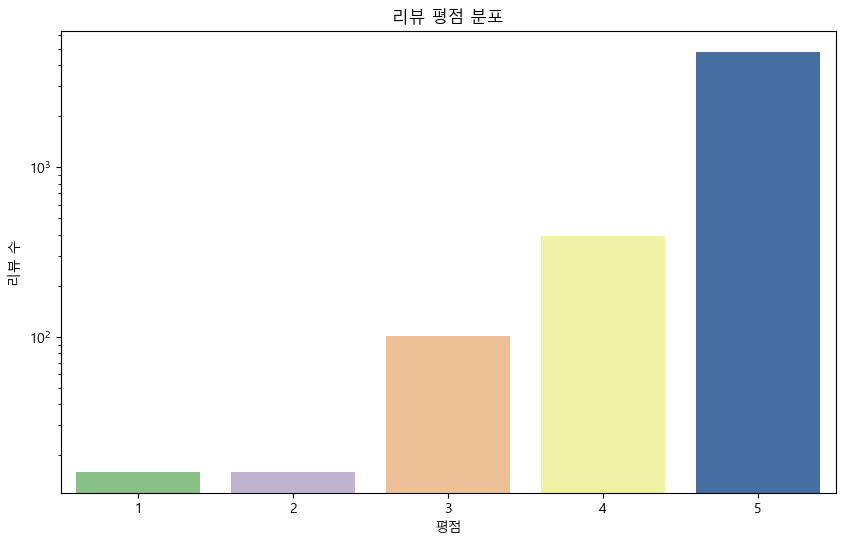

In [214]:
# 리뷰 평점 분포 (문제 발생)
#  y축에서 log 사용 시 시각화 자료에서도 y값에 log가 적용되는 현상 발생(이에 대한 해결책)

rating_counts = review['평점'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Accent')
plt.title('리뷰 평점 분포')
plt.xlabel('평점')
plt.ylabel('리뷰 수')
plt.yscale('log')
plt.show()

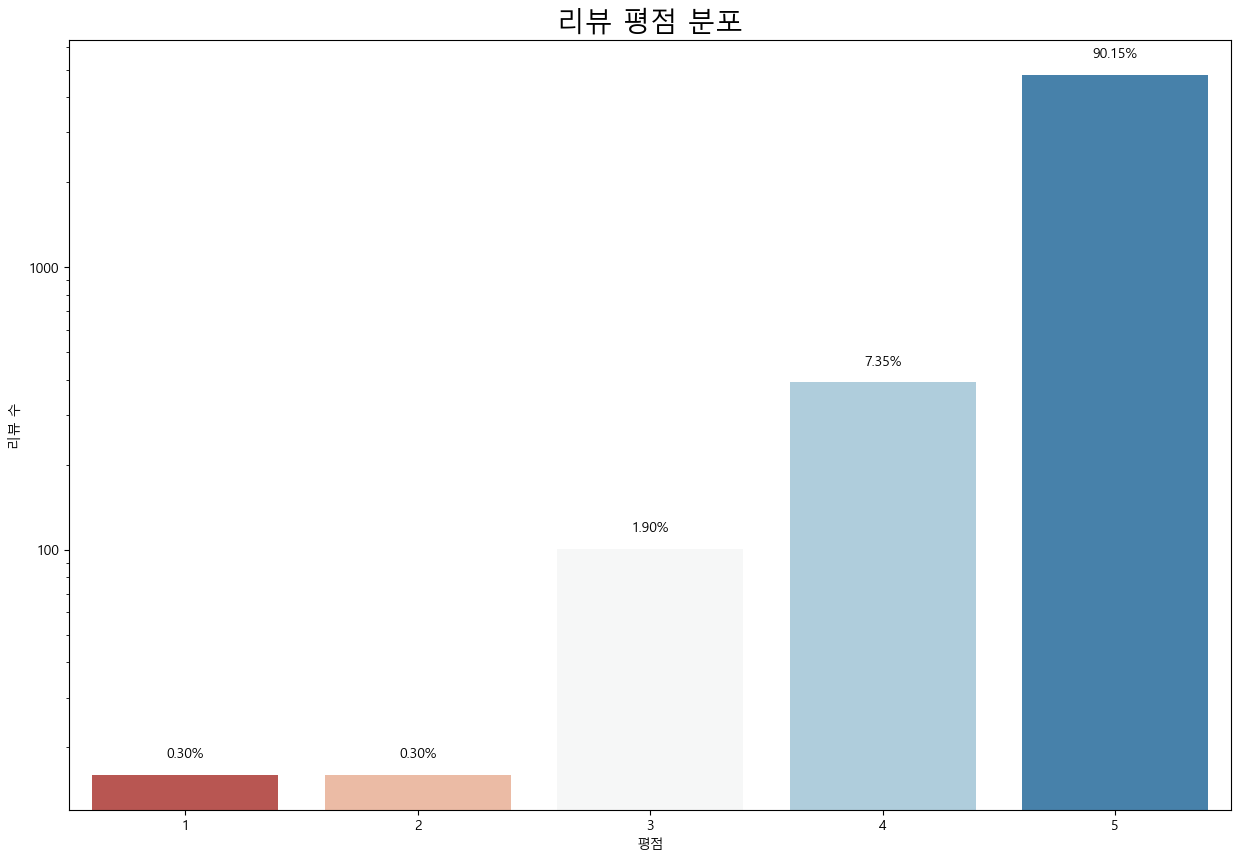

In [246]:
# 리뷰 평점 분포 (퍼센트 추가, y축 값 직접입력)
rating_counts = review['평점'].value_counts().sort_index()

total_reviews = rating_counts.sum() # rating_counts(평점 길이)
rating_percentages = (rating_counts / total_reviews) * 100 # 백분율 계산 코드 ((평점 개수/평점 길이)*100)

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='RdBu')
# 혹시 색상도 추가로 알아봤는데 5점에 가까울수록 진하게 나타내는 건 어떠신지요...
plt.yscale('log')
plt.title('리뷰 평점 분포', size=20)
plt.xlabel('평점')
plt.ylabel('리뷰 수')

ax.yaxis.set_major_formatter(plt.ScalarFormatter())  # y축 값의 포맷을 일반적인 숫자 형식으로 표시

# 각 막대의 상단에 퍼센트 표시
for p, percentage in zip(ax.patches, rating_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

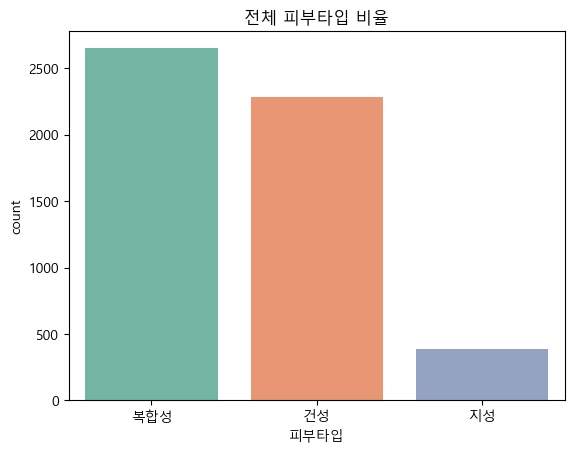

In [164]:
# 전체 피부타입 비율 확인

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

review['피부타입'] = review['피부타입'].replace({
    '복합성에 좋아요': '복합성', 
    '건성에 좋아요': '건성', 
    '지성에 좋아요': '지성'
})

sns.countplot(x='피부타입', data=review, palette='Set2')
plt.title('전체 피부타입 비율')

plt.show()

In [165]:
brands = review['브랜드'].unique()
brands

array(['닥터지', '마녀공장', '아비브', '에스트라', 'AHC', 'CNP'], dtype=object)

In [166]:
# 각 브랜드별 피부타입 분포(수치 확인)
review.groupby(review['브랜드']).피부타입.count()

브랜드
AHC     897
CNP     817
닥터지     896
마녀공장    903
아비브     905
에스트라    904
Name: 피부타입, dtype: int64

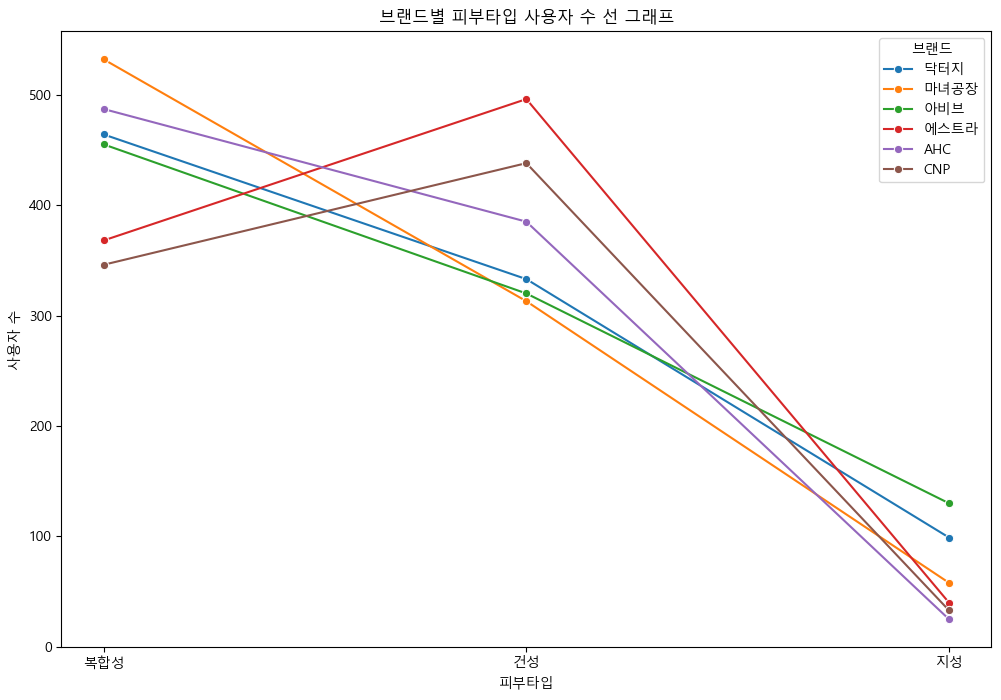

In [167]:
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부타입'].value_counts().reindex(['복합성', '건성', '지성'], fill_value=0).reset_index()
    count_data.columns = ['피부타입', '사용자']
    sns.lineplot(data=count_data, x='피부타입', y='사용자', label=brand, marker='o') 
    # 그래프가 번지는 느낌이 보기에 별로 안좋은 것 같아서 'ci=None'을 추가했습니다.
    
plt.legend(title='브랜드')
plt.title('브랜드별 피부타입 사용자 수 선 그래프')
plt.xlabel('피부타입')
plt.ylabel('사용자 수')
plt.show()

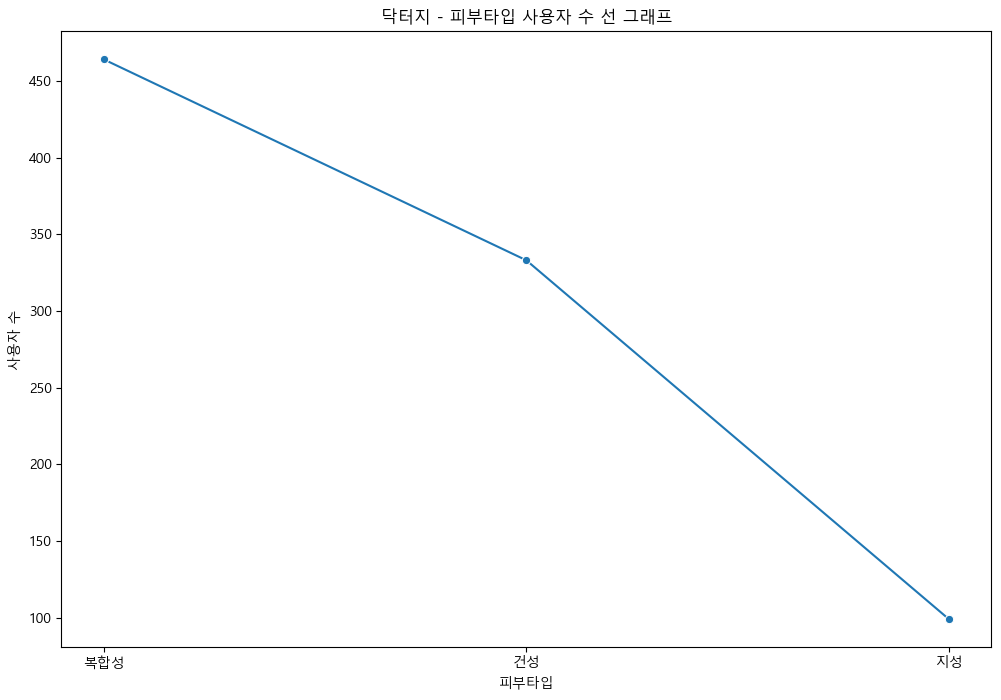

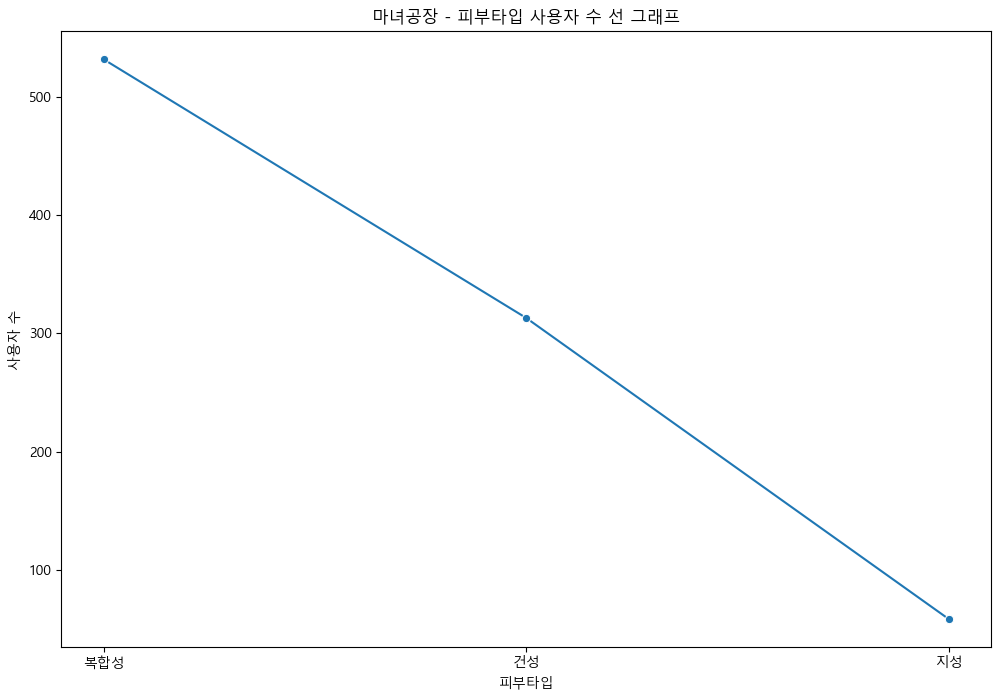

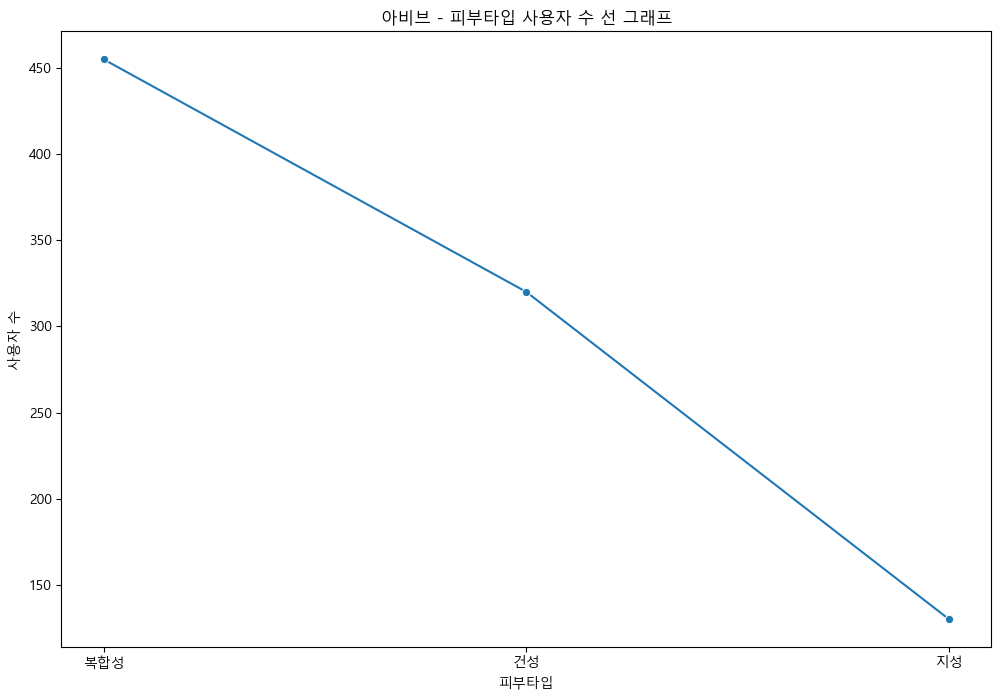

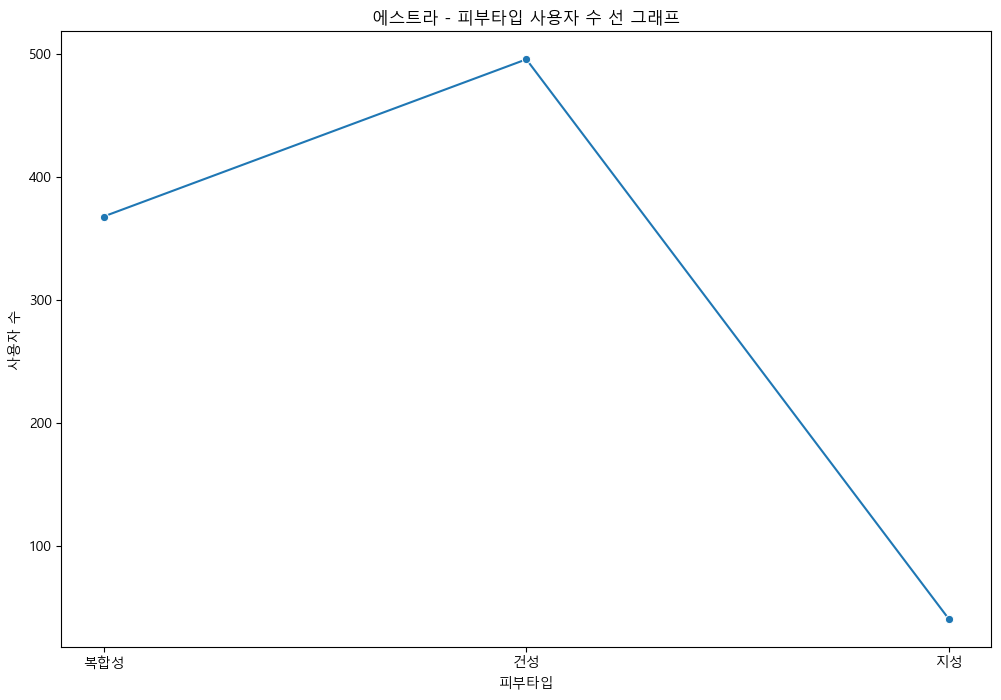

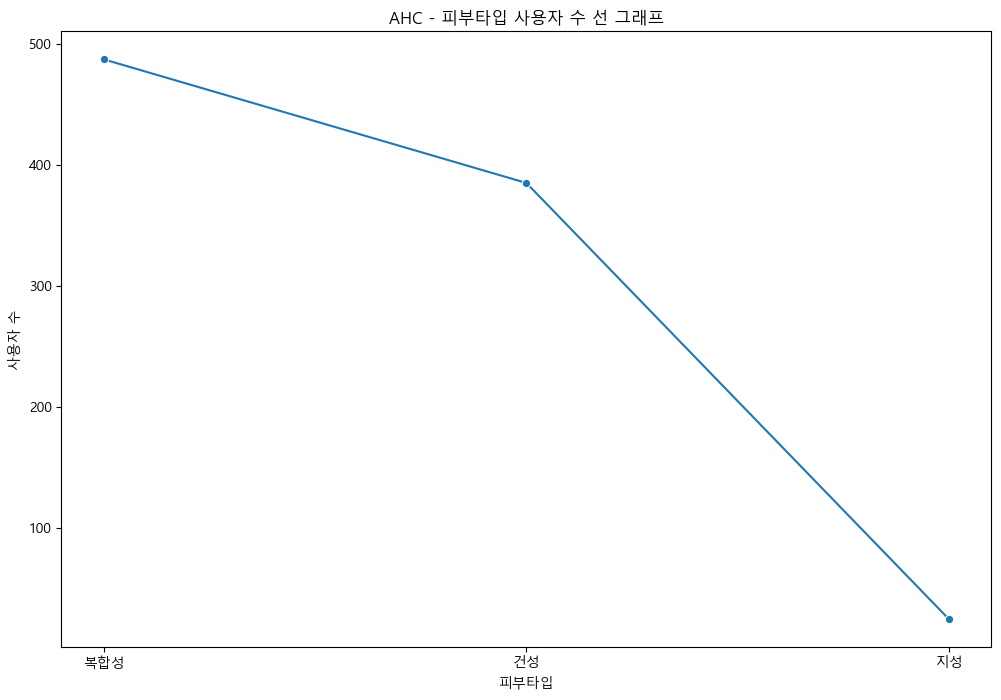

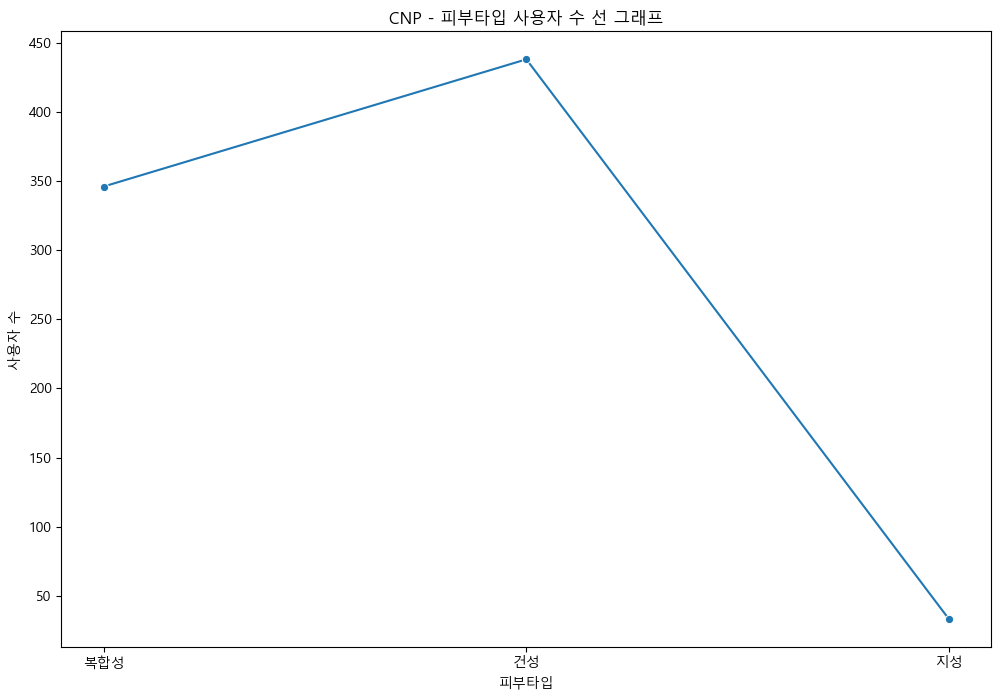

In [168]:
# 각 브랜드를 개별 그래프로 표현
for brand in brands:
    plt.figure(figsize=(12, 8))
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부타입'].value_counts().reindex(['복합성', '건성', '지성'], fill_value=0).reset_index()
    count_data.columns = ['피부타입', '사용자']
    sns.lineplot(data=count_data, x='피부타입', y='사용자', ci=None, marker='o')
    plt.title(f'{brand} - 피부타입 사용자 수 선 그래프')
    plt.xlabel('피부타입')
    plt.ylabel('사용자 수')
    plt.show()

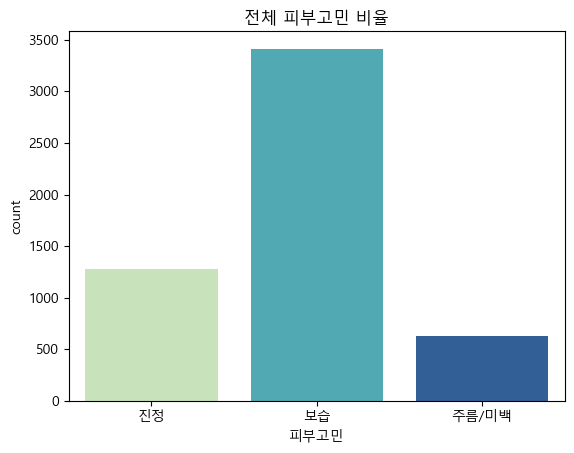

In [169]:
# 전체 피부고민 비율 확인하기
review['피부고민'] = review['피부고민'].replace({
    '진정에 좋아요': '진정', 
    '보습에 좋아요': '보습', 
    '주름/미백에 좋아요': '주름/미백'
})

sns.countplot(x='피부고민', data=review, palette='YlGnBu')
plt.title('전체 피부고민 비율')

plt.show()

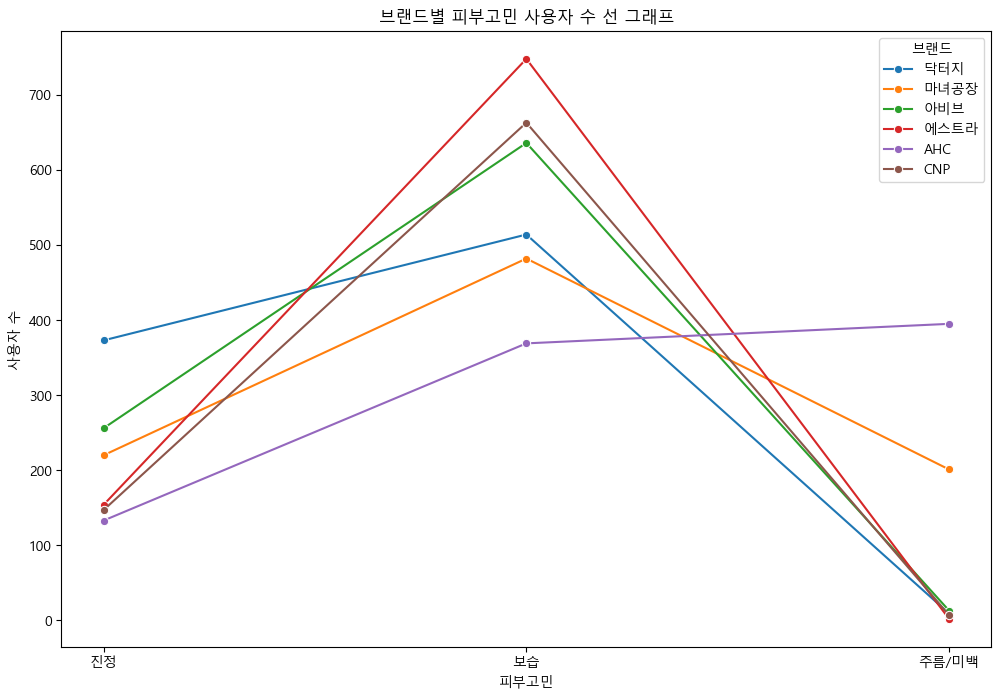

In [170]:
# 브랜드 별 피부고민 확인하기
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부고민'].value_counts().reindex(['진정', '보습', '주름/미백'], fill_value=0).reset_index()
    count_data.columns = ['피부고민', '사용자']
    sns.lineplot(data=count_data, x='피부고민', y='사용자', label=brand, ci=None, marker='o') 

plt.legend(title='브랜드')
plt.title('브랜드별 피부고민 사용자 수 선 그래프')
plt.xlabel('피부고민')
plt.ylabel('사용자 수')
plt.show()

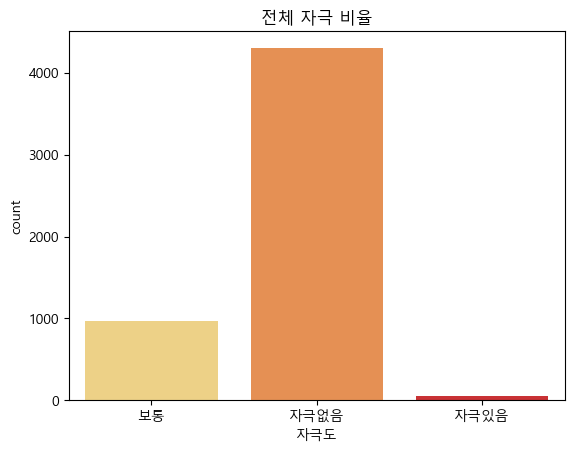

In [171]:
# 전체 자극도 비율 확인하기
review['자극도'] = review['자극도'].replace({
    '보통이에요': '보통', 
    '자극없이 순해요': '자극없음', 
    '자극이 느껴져요': '자극있음'
})

sns.countplot(x='자극도', data=review, palette='YlOrRd')
plt.title('전체 자극 비율')

plt.show()

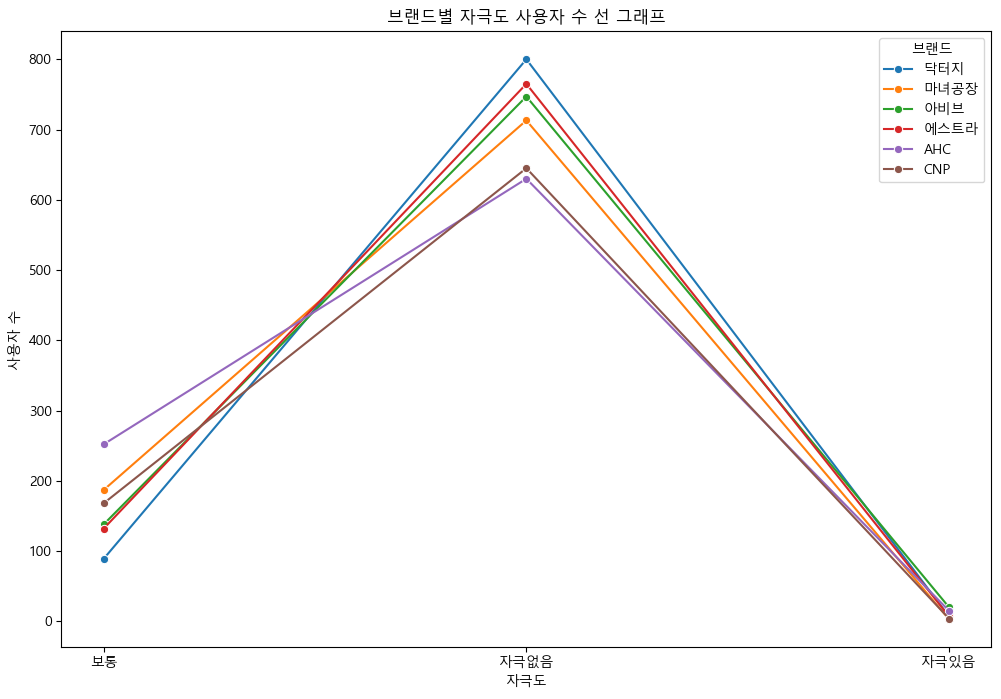

In [172]:
# 브랜드 별 자극도 확인하기
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['자극도'].value_counts().reindex(['보통', '자극없음', '자극있음'], fill_value=0).reset_index()
    count_data.columns = ['자극도', '사용자']
    sns.lineplot(data=count_data, x='자극도', y='사용자', label=brand, ci=None, marker='o') 

plt.legend(title='브랜드')
plt.title('브랜드별 자극도 사용자 수 선 그래프')
plt.xlabel('자극도')
plt.ylabel('사용자 수')
plt.show()

# 불용어 처리

In [249]:
# 예시로 돌려본 코딩
from konlpy.tag import Okt

okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


In [251]:
text = []
for i in review['리뷰']:
    text.append(i)

In [253]:
from konlpy.tag import Okt

okt = Okt()

# 형태소 분석
morphs = okt.morphs(text[0])
print('Morphs:', morphs)

# 품사태깅
pos = okt.pos(text[0])
print('POS:', pos)

# 명사 추출
nouns = okt.nouns(text[0])
print('Nouns:', nouns)

# 어간 추출
stemmed = okt.morphs(text[0], stem=True)
print('Stemmed:', stemmed)

Morphs: ['컵', '받고싶어서', '샀어요', '크림', '은', '튜브', '형태', '러', '내줄', '생각', '은', '없는', '건지', '궁금해요']
POS: [('컵', 'Noun'), ('받고싶어서', 'Verb'), ('샀어요', 'Verb'), ('크림', 'Noun'), ('은', 'Josa'), ('튜브', 'Noun'), ('형태', 'Noun'), ('러', 'Noun'), ('내줄', 'Verb'), ('생각', 'Noun'), ('은', 'Josa'), ('없는', 'Adjective'), ('건지', 'Verb'), ('궁금해요', 'Adjective')]
Nouns: ['컵', '크림', '튜브', '형태', '러', '생각']
Stemmed: ['컵', '받다', '사다', '크림', '은', '튜브', '형태', '러', '내주다', '생각', '은', '없다', '건지다', '궁금하다']


In [257]:
file = open('Korean Stopwords.txt', 'r', encoding='utf-8')
str = file.read() 
print(f'파일 내용 : {str}')
file.close()

파일 내용 : 아
휴
아이구
아이쿠
아이고
어
나
우리
저희
따라
의해
을
를
에
의
가
으로
로
에게
뿐이다
의거하여
근거하여
입각하여
기준으로
예하면
예를 들면
예를 들자면
저
소인
소생
저희
지말고
하지마
하지마라
다른
물론
또한
그리고
비길수 없다
해서는 안된다
뿐만 아니라
만이 아니다
만은 아니다
막론하고
관계없이
그치지 않다
그러나
그런데
하지만
든간에
논하지 않다
따지지 않다
설사
비록
더라도
아니면
만 못하다
하는 편이 낫다
불문하고
향하여
향해서
향하다
쪽으로
틈타
이용하여
타다
오르다
제외하고
이 외에
이 밖에
하여야
비로소
한다면 몰라도
외에도
이곳
여기
부터
기점으로
따라서
할 생각이다
하려고하다
이리하여
그리하여
그렇게 함으로써
하지만
일때
할때
앞에서
중에서
보는데서
으로써
로써
까지
해야한다
일것이다
반드시
할줄알다
할수있다
할수있어
임에 틀림없다
한다면
등
등등
제
겨우
단지
다만
할뿐
딩동
댕그
대해서
대하여
대하면
훨씬
얼마나
얼마만큼
얼마큼
남짓
여
얼마간
약간
다소
좀
조금
다수
몇
얼마
지만
하물며
또한
그러나
그렇지만
하지만
이외에도
대해 말하자면
뿐이다
다음에
반대로
반대로 말하자면
이와 반대로
바꾸어서 말하면
바꾸어서 한다면
만약
그렇지않으면
까악
툭
딱
삐걱거리다
보드득
비걱거리다
꽈당
응당
해야한다
에 가서
각
각각
여러분
각종
각자
제각기
하도록하다
와
과
그러므로
그래서
고로
한 까닭에
하기 때문에
거니와
이지만
대하여
관하여
관한
과연
실로
아니나다를가
생각한대로
진짜로
한적이있다
하곤하였다
하
하하
허허
아하
거바
와
오
왜
어째서
무엇때문에
어찌
하겠는가
무슨
어디
어느곳
더군다나
하물며
더욱이는
어느때
언제
야
이봐
어이
여보시오
흐흐
흥
휴
헉헉
헐떡헐떡
영차
여차
어기여차
끙끙
아야
앗
아야
콸콸
졸졸
좍좍
뚝뚝
주룩주룩
솨
우르르
그래도
또
그리고
바꾸어말하면
바꾸어말하자면
혹은
혹시
답다
및
그에 따르는
때가 되어
즉
지든지
설령
가령
하더라도
할지라도
일지라도
지든지
몇
거의
하마터면
인젠
이젠

In [259]:
# 어간 추출
okt = Okt()

stemmed = []

for i in range(0,5322):
    morphs = okt.morphs(text[i])
    stemmed.append(morphs)

# txt 긍정/부정

In [220]:
# 한글 폰트 설정 (경로를 실제 설치된 한글 폰트로 변경해야 함)
font_path = 'C:/Windows/Fonts/malgun.ttf'
# font_path = '/Library/Fonts/AppleGothic.ttf' -> 맥

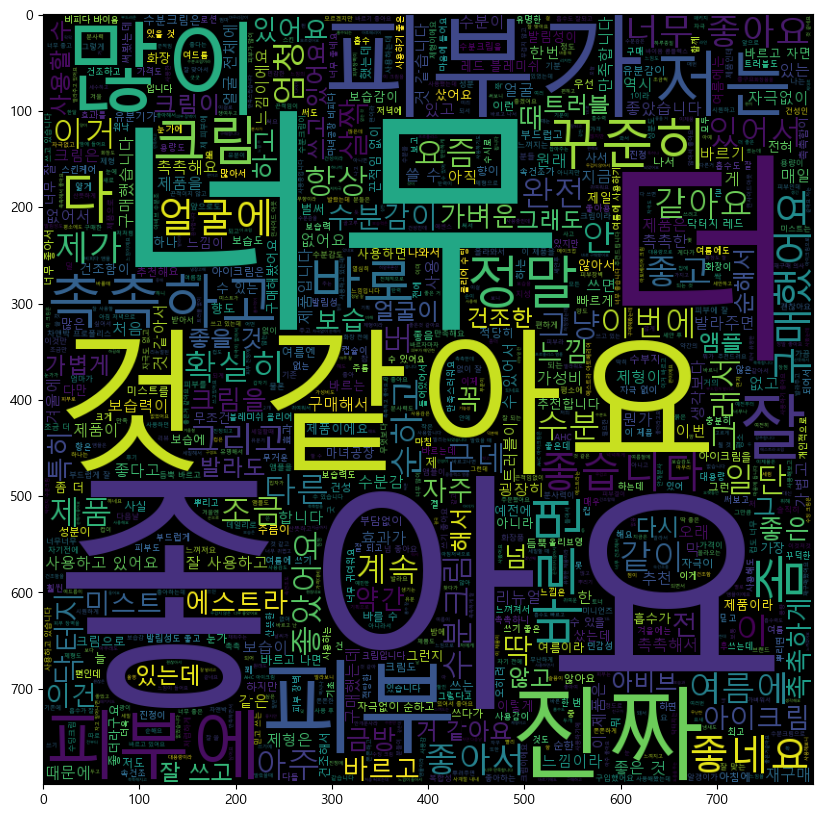

In [226]:
# 긍정 리뷰 워드클라우드
review['평점'] = review['평점'].astype(int)
plt.figure(figsize=(10,10))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 800, height=800).generate(' '.join(review[review.평점 >= 4].리뷰))
plt.imshow(wc)

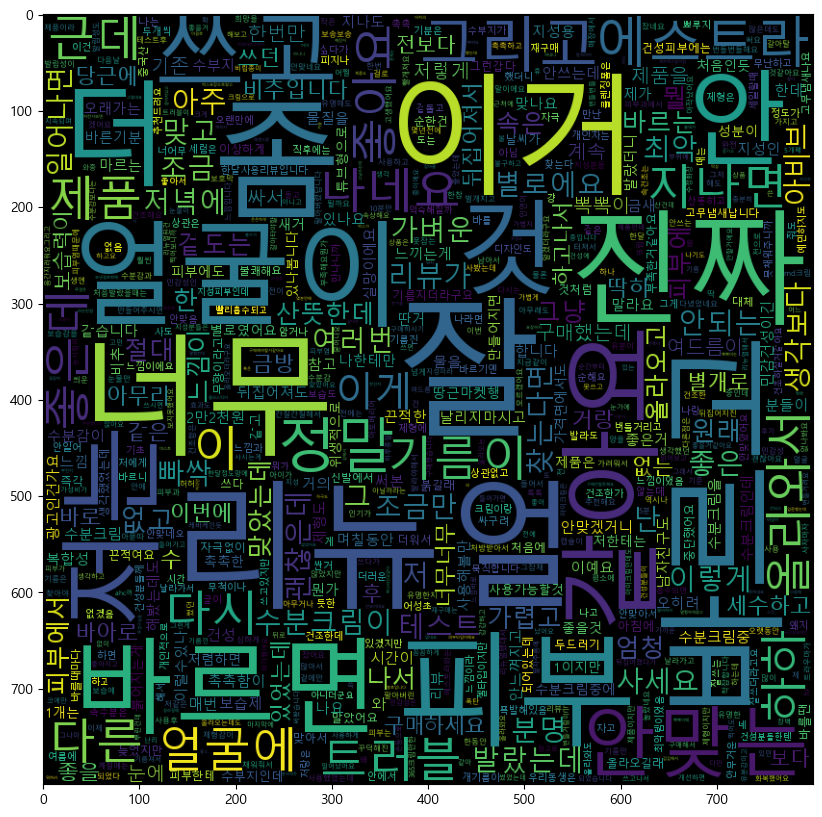

In [223]:
# 부정 리뷰 워드클라우드
review['평점'] = review['평점'].astype(int)
plt.figure(figsize=(10,10))
wc = WordCloud(font_path=font_path, max_words = 2000, width = 800, height=800).generate(' '.join(review[review.평점 <= 2].리뷰))
plt.imshow(wc)